#### Keras 回归测试

* 使用分类中的不同损失函数进行回归; 均方误差（MSE）是回归的常用损失函数。
* 同样，用于回归的评估指标与用于分类的评估指标不同; 自然地，“准确性”的概念不适用于回归。常见的回归度量是平均绝对误差（MAE）。
* 当输入数据中的要素具有不同范围的值时，应将每个要素作为预处理步骤独立定标。
* 当可用数据很少时，使用K-Fold验证是可靠评估模型的好方法。
* 当可获得的训练数据很少时，最好使用隐藏层很少（通常只有一个或两个）的小型网络，以避免严重的过度拟合。

In [1]:
import sys
sys.path.append("..")

import keras
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from stock_ai import ploter
from examples import get_data_regression

Using TensorFlow backend.


PLEASE install TALIB to call these methods
PLEASE install TALIB to call these methods


##### 获取数据

完整数据为601398日线数据+399300日线数据

默认取 5 天的数据作为输入数据。第 6 天的数据为结果数据。以此类推。采用 `TimeseriesGenerator` 对数据进行分割。

In [2]:
(x_train, y_train), (x_test, y_test) = get_data_regression()

print(x_train.shape, 'x_train sequences')
print(y_train.shape, 'y_train sequences')
print(x_test.shape, 'x_test sequences')
print(y_test.shape, 'y_test sequences')

['open601398', 'high601398', 'low601398', 'close601398']
(2679, 5, 4) x_train sequences
(2679,) y_train sequences
(298, 5, 4) x_test sequences
(298,) y_test sequences


`x` 为去掉601398的 `open', 'high', 'low','close` 数据。对每一笔数据进行单独标准化处理 `sklearn.preprocessing.MinMaxScaler`。

In [3]:
x_train[-1]

array([[6.24, 6.25, 6.09, 6.1 ],
       [6.11, 6.13, 6.06, 6.09],
       [6.09, 6.1 , 5.99, 6.09],
       [6.07, 6.11, 6.01, 6.1 ],
       [6.06, 6.08, 6.  , 6.05]])

`y` 为601398的close数据。

In [4]:
y_train[-1]

6.07

使用 **mse** 损失函数编译网络- 均值平方误差，预测和目标之间差异的平方，这是回归问题的一种广泛使用的损失函数。

监控新指标：**mae**。这代表平均绝对误差。它只是预测和目标之间差异的绝对值。~~例如，这个问题的MAE为0.5意味着我们的预测平均减少 500 美元。~~

In [5]:
def build_model():
    print('Building model...')

    model = Sequential()
    model.add(
        LSTM(512,
             input_shape=x_train[0].shape,
             activation='relu',
             return_sequences=True))
    model.add(LSTM(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    return model

In [6]:
model=build_model()

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

batch_size = 128
epochs = 100
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1)

Building model...
Instructions for updating:
Colocations handled automatically by placer.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 2411 samples, validate on 268 samples
Epoch 1/100
 - 7s - loss: 43.8067 - mean_absolute_error: 3.1122 - val_loss: 0.5878 - val_mean_absolute_error: 0.7053
Epoch 2/100
 - 5s - loss: 0.7463 - mean_absolute_error: 0.6752 - val_loss: 0.0719 - val_mean_absolute_error: 0.2450
Epoch 3/100
 - 5s - loss: 0.3636 - mean_absolute_error: 0.4679 - val_loss: 0.4098 - val_mean_absolute_error: 0.6295
Epoch 4/100
 - 5s - loss: 0.4697 - mean_absolute_error: 0.5410 - val_loss: 0.4872 - val_mean_absolute_error: 0.6810
Epoch 5/100
 - 5s - loss: 0.8645 - mean_absolute_error: 0.7728 - val_loss: 0.5843 - val_mean_absolute_error: 0.7434
Epoch 6/100
 - 4s - loss: 0.8082 - mean_absolute_error: 0.6915 - val_loss: 2.8286 - val_mean_absolute_error: 1.6569
Epoch 7/100
 - 4s - loss: 1.0845 - mean_absolute_error: 0.8411 - val_loss: 0.0266 - val_mean_absolute_error: 0.1453
Epoch 8/100
 - 4s - loss: 0.7163 - mean_absolute_error: 0.6633 - val_loss: 1.0757 - val_mean_absolute_error: 1.0095
Epoch 9/100
 - 4s - loss

Epoch 71/100
 - 5s - loss: 0.1934 - mean_absolute_error: 0.3393 - val_loss: 0.0777 - val_mean_absolute_error: 0.2691
Epoch 72/100
 - 5s - loss: 0.1780 - mean_absolute_error: 0.3312 - val_loss: 0.0811 - val_mean_absolute_error: 0.2687
Epoch 73/100
 - 4s - loss: 0.1725 - mean_absolute_error: 0.3219 - val_loss: 0.1548 - val_mean_absolute_error: 0.3852
Epoch 74/100
 - 4s - loss: 0.1922 - mean_absolute_error: 0.3359 - val_loss: 0.0621 - val_mean_absolute_error: 0.2395
Epoch 75/100
 - 4s - loss: 0.1772 - mean_absolute_error: 0.3287 - val_loss: 0.1636 - val_mean_absolute_error: 0.3898
Epoch 76/100
 - 4s - loss: 0.1781 - mean_absolute_error: 0.3278 - val_loss: 0.0093 - val_mean_absolute_error: 0.0806
Epoch 77/100
 - 4s - loss: 0.1670 - mean_absolute_error: 0.3114 - val_loss: 0.0131 - val_mean_absolute_error: 0.0888
Epoch 78/100
 - 4s - loss: 0.1980 - mean_absolute_error: 0.3432 - val_loss: 0.1248 - val_mean_absolute_error: 0.3393
Epoch 79/100
 - 4s - loss: 0.1811 - mean_absolute_error: 0.3294 

In [7]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 512)            1058816   
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 3,158,529
Trainable params: 3,158,529
Non-trainable params: 0
_________________________________________________________________


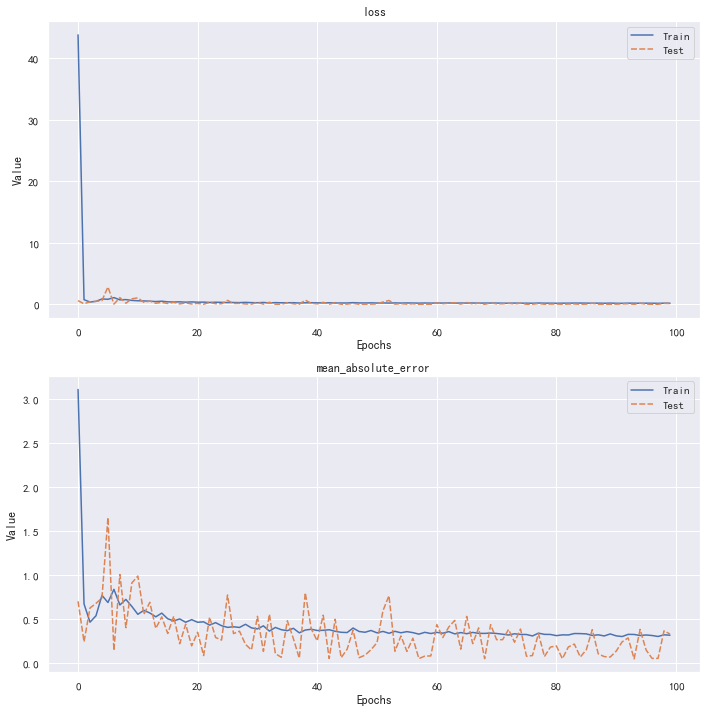

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\Anaconda3\\envs\\stock_ai\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
ploter.plot_keras_history(history)

In [9]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
'Test MSE score:{0}, \n Test MAE score:{1}'.format(score[0], score[1])

298/298 [==============================] - ETA:  - ETA:  - 0s 636us/step


'Test MSE score:0.1540039367723785, \n Test MAE score:0.3689832577369357'

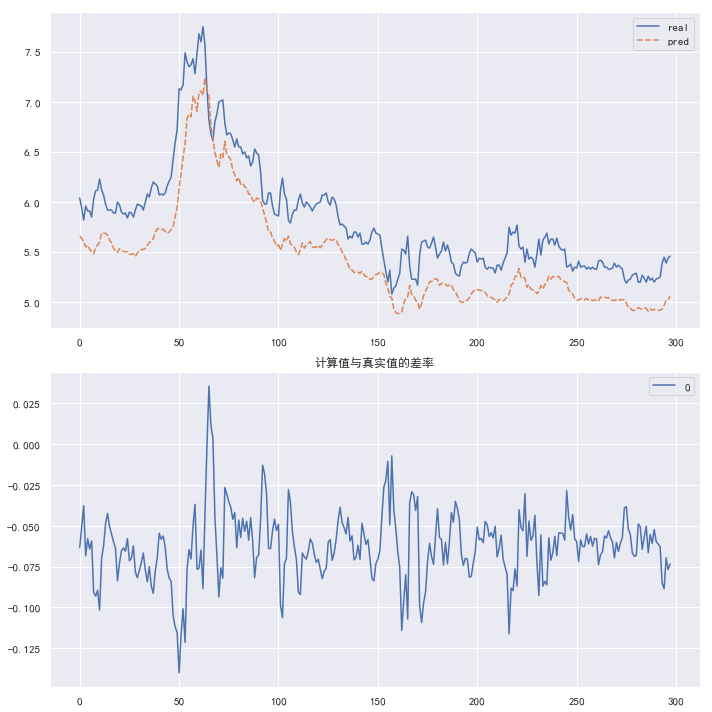

In [11]:
d,c=ploter.plot_pred_compare_real(y_test,model.predict(x_test))

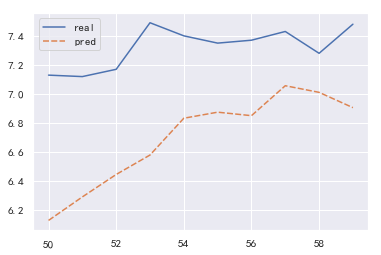

In [13]:
sns.lineplot(data=d.iloc[50:60])